In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
fair_df = sm.datasets.fair.load_pandas().data

# Affair or No – Classification

In [4]:
X = fair_df.iloc[:, :-1]
y = fair_df.affairs > 0

display(
    X.head(),
    y.head(),
    y.groupby(y).count(),
)

X_affairyn = X
y_affairyn = y

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

affairs
False    4313
True     2053
Name: affairs, dtype: int64

## Split the Test Set Out for Evaluating

In [5]:
X = X_affairyn
y = y_affairyn

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=0.4, random_state=0
)

print(f'''\
X: {X.shape} → {X_train.shape} / {X_test.shape}
y: {y.shape} → {y_train.shape} / {y_test.shape}''')

X_affairyn_train = X_train
X_affairyn_test = X_test
y_affairyn_train = y_train
y_affairyn_test = y_test

X: (6366, 8) → (3819, 8) / (2547, 8)
y: (6366,) → (3819,) / (2547,)


## Fit and Evaluate the Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

CPU times: user 45.2 ms, sys: 3.82 ms, total: 49 ms
Wall time: 47 ms

             precision    recall  f1-score   support

      False       0.74      0.82      0.78      1734
       True       0.50      0.39      0.44       813

avg / total       0.67      0.68      0.67      2547



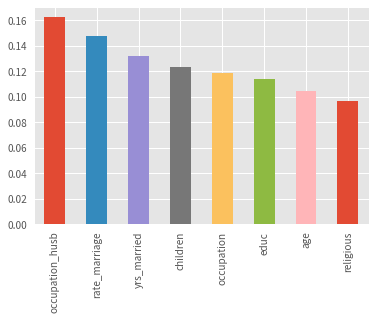

In [6]:
X_train = X_affairyn_train
y_train = y_affairyn_train
X_test = X_affairyn_test
y_test = y_affairyn_test
column_names = X_affairyn.columns

m = ensemble.RandomForestClassifier()
print(m)
print()

%time m.fit(X_train, y_train)
print()

y_predict = m.predict(X_test)
print(metrics.classification_report(y_test, y_predict))

pd.Series(
    m.feature_importances_,
    index=column_names
).sort_values(ascending=False).plot.bar()

y_affairyn_predict = y_predict

<img style="float: left;" alt="Manual_decision_tree.jpg" src="https://upload.wikimedia.org/wikipedia/commons/c/c6/Manual_decision_tree.jpg">
<div style="clear: both"></div>

* ↑ decision tree.
* A random forest = $n$ decision trees.
* Output the class that is the *mode* of the classes.
* Output the feature importances.
* Don't need too much preprocessing.

<img style="float: left;" alt="Precisionrecall.svg" src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg">

## Evaluate With a Random Prediction

In [7]:
y_test = y_affairyn_test

y_predict = np.random.randint(0, 2, size=y_affairyn_predict.shape[0]) == 1
print(metrics.classification_report(y_test, y_predict))

y_affairyn_predict_random = y_predict

             precision    recall  f1-score   support

      False       0.67      0.49      0.56      1734
       True       0.30      0.48      0.37       813

avg / total       0.55      0.48      0.50      2547



## Visualization

In [8]:
from sklearn.decomposition import PCA

In [9]:
X = X_affairyn_test

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_affairyn_test_pca = X_pca

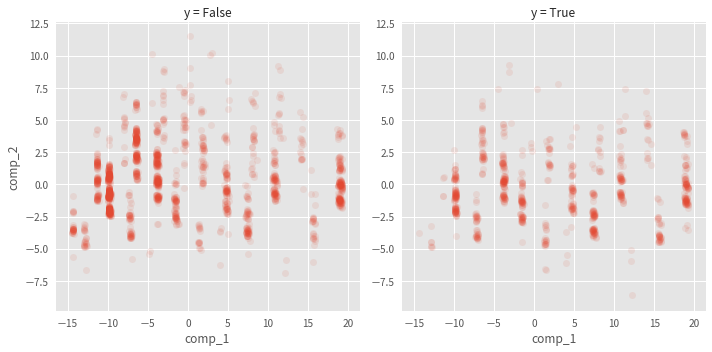

In [10]:
X = X_affairyn_test_pca
y = y_affairyn_test

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)

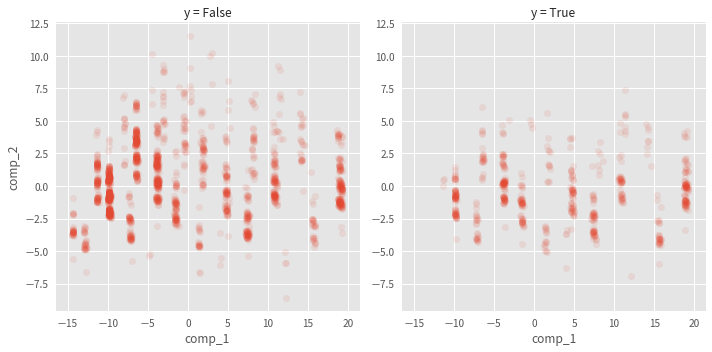

In [11]:
X = X_affairyn_test_pca
y = y_affairyn_predict

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)

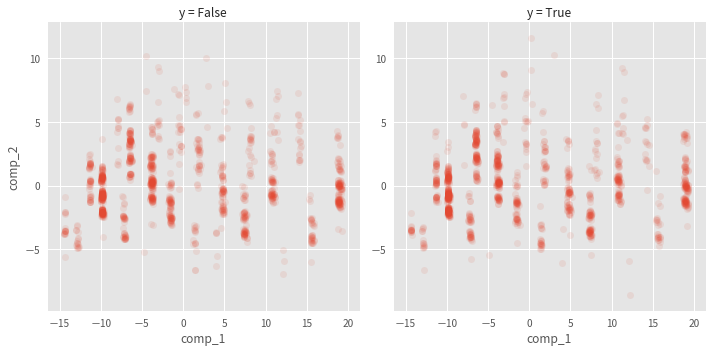

In [12]:
X = X_affairyn_test_pca
y = y_affairyn_predict_random

sns.lmplot(
    data=pd.DataFrame(dict(
        comp_1=X[:, 0],
        comp_2=X[:, 1],
        y=y
    )),
    x='comp_1', y='comp_2', col='y',
    fit_reg=False, scatter_kws={'alpha': 0.1}
)